In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("global_path/plots")
from plot_utils import *
data_path = "../data/sgdm_wobn"
image_path = "./images/sgdm_wobn"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.0128 & 82.43\%
Best of norm is 1.0 & 84.41\%
Best of cnorm is 0.8 & 86.9\%
Best of cnormu is 0.8 & 84.8\%
Best of gcstdu is 1.0 & 84.02\%
Best of wd is 8e-05 & 84.17\%


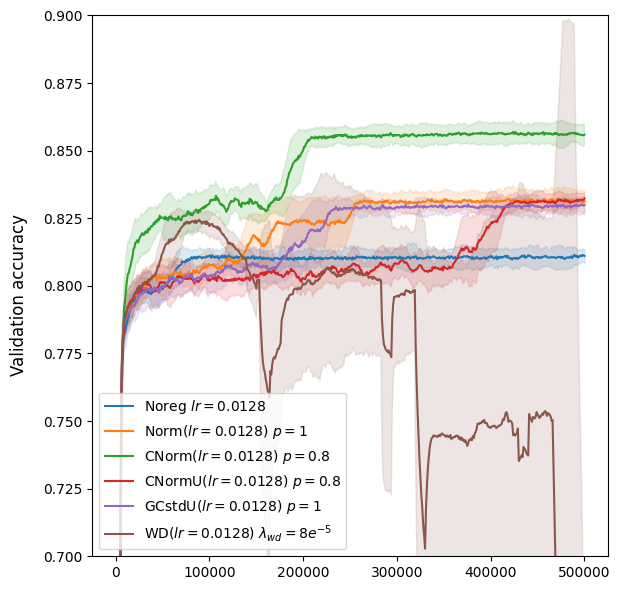

In [18]:
fig,axs = plot_wobn_best_hyperparameter_validation_curve(data_path,image_path,
                                               ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                                               [r"Noreg $lr = 0.0128$", r"Norm($lr = 0.0128$) $p=1$", r"CNorm($lr = 0.0128$) $p=0.8$", r"CNormU($lr = 0.0128$) $p=0.8$",
                                                 r"GCstdU($lr = 0.0128$) $p=1$", r"WD($lr = 0.0128$) $\lambda_{wd}=8e^{-5}$" ],
                                               [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],
                                               500000)
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/best_hyperparameter_validation_accuracy.png", bbox_inches='tight',dpi=600)

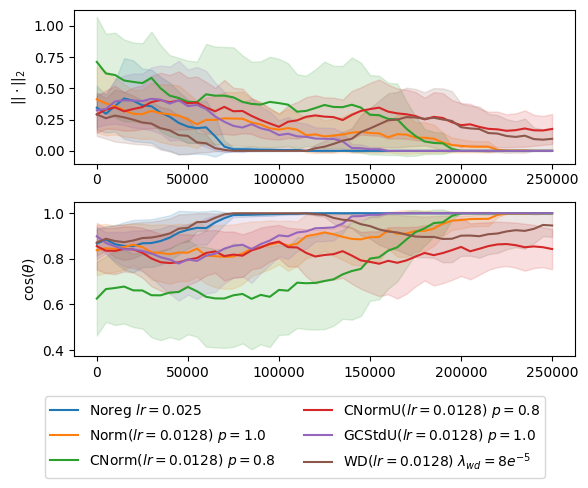

In [19]:
fig,axs = distribution_drift(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.0128$) $p=1.0$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$",r"WD($lr=0.0128$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])
fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics.png", bbox_inches='tight',dpi=600)

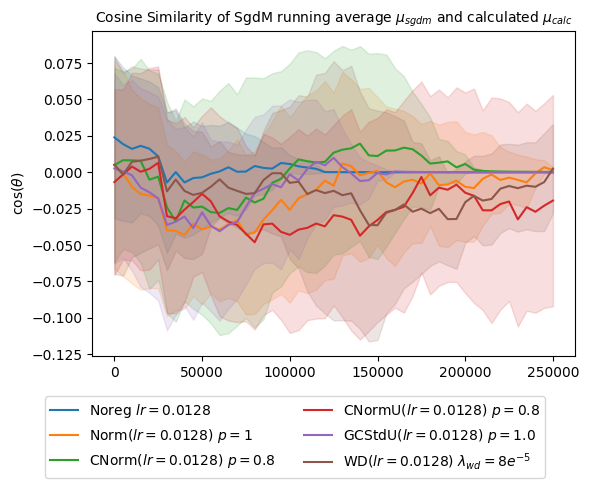

In [20]:
fig,axs = sgdm_drift(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                             [r"Noreg $lr=0.0128$","Norm($lr=0.0128$) $p=1$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$",r"WD($lr=0.0128$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/sgdm_drift.png", bbox_inches='tight',dpi=600)

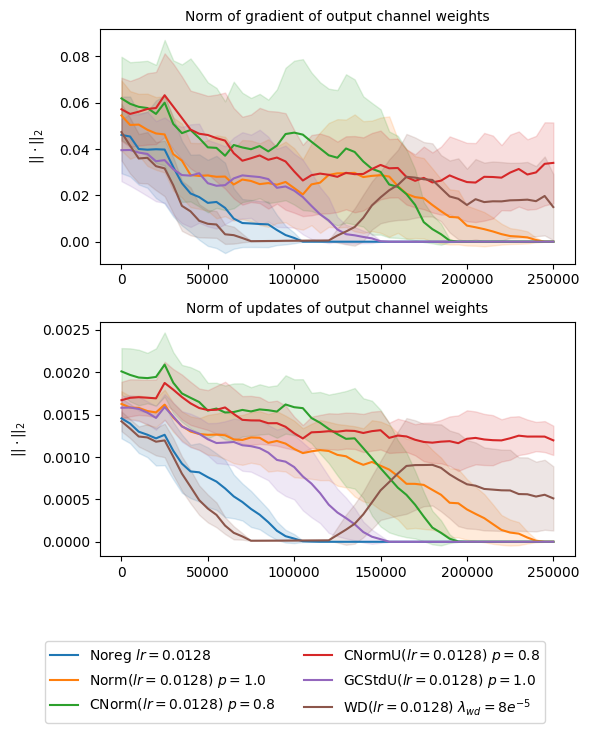

In [21]:

fig,axs = gradients_and_updates(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                     [r"Noreg $lr=0.0128$","Norm($lr=0.0128$) $p=1.0$","CNorm($lr=0.0128$) $p=0.8$","CNormU($lr=0.0128$) $p=0.8$","GCStdU($lr=0.0128$) $p=1.0$",r"WD($lr=0.0128$) $\lambda_{wd}=8e^{-5}$"],
                     [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],"mg_spacing_0",layer="conv|out")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm.png", bbox_inches='tight',dpi=600)
